In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x) 


In [2]:
df = pd.read_csv('coaster_db.csv')
df.head(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.57,-73.98,Wood,1884-06-16,6 mph,9.7 km/h,6.00,mph,6.00,50.00,ft,NaN,0,2.90
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.00,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.58,-73.98,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.00
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.58,-81.57,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.00,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.57,-73.98,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.35,-74.43,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [3]:
df.shape

(1087, 56)

In [4]:
df = df[['coaster_name', 
    #'Length', 'Speed', 
    'Location', 'Status',
    #'Opening date',
     #  'Type', 
    'Manufacturer', 
    #'Height restriction', 'Model', 'Height',
     #  'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
      # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
      # 'Track layout', 'Fastrack available', 'Soft opening date.1',
       #'Closing date', 'Opened', 'Replaced by', 'Website',
       #'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       #'Single rider line available', 'Restraint Style',
       #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #'height_value', 'height_unit', 
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [10]:
df.dtypes

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

In [6]:
df.describe()

,year_introduced,latitude,longitude,speed_mph,height_ft,Inversions_clean,Gforce_clean
count,1087.00,812.00,812.00,937.00,171.00,1087.00,362.00
mean,1994.99,38.37,-41.60,48.62,102.00,1.33,3.82
std,23.48,15.52,72.29,16.68,67.33,2.03,0.99
min,1884.00,-48.26,-123.04,5.00,13.10,0.00,0.80
25%,1989.00,35.03,-84.55,37.30,51.80,0.00,3.40
50%,2000.00,40.29,-76.65,49.70,91.20,0.00,4.00
75%,2010.00,44.80,2.78,58.00,131.20,2.00,4.50
max,2022.00,63.23,153.43,149.10,377.30,14.00,12.00


In [7]:
df.head()

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.57,-73.98,Wood,1884-06-16,6.00,NaN,0,2.90
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.58,-73.98,Wood,1895-01-01,NaN,NaN,1,12.00
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.58,-81.57,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.57,-73.98,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.35,-74.43,Steel,1901-01-01,NaN,NaN,1,NaN


In [8]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [9]:
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [41]:
df = df.rename(columns = {
    
  'coaster_name': 'Coaster_Name',
  'year_introduced': 'Year_Introduced', 
  'opening_date_clean' : 'Opening_date',
   'speed_mph': 'Speed_mph',
    'height_ft': 'Height',
    'Inversions_clean': 'Inversion',
    'Gforce_clean': 'Gforce'
}  )

In [12]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_date,Speed,Height,Inversion,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.57,-73.98,Wood,1884-06-16,6.00,NaN,0,2.90
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.58,-73.98,Wood,1895-01-01,NaN,NaN,1,12.00
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.58,-81.57,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.57,-73.98,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.35,-74.43,Steel,1901-01-01,NaN,NaN,1,NaN


In [13]:
df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
latitude           275
longitude          275
Type_Main            0
Opening_date       250
Speed              150
Height             916
Inversion            0
Gforce             725
dtype: int64

In [15]:
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_date,Speed,Height,Inversion,Gforce


In [18]:
df.loc[df.duplicated(subset = ['Coaster_Name'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_date,Speed,Height,Inversion,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.86,-79.06,Wood,1926-01-01,60.00,NaN,0,4.00
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.42,-70.99,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.63,-80.32,Wood,1938-05-23,50.00,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.00,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.84,-79.54,Steel,1981-05-23,39.80,32.80,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.13,-74.44,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.63,-80.32,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.03,-82.42,Steel,NaT,76.00,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.00,NaN,3,4.70


In [19]:
df.query('Coaster_Name == "Iron Gwazi"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_date,Speed,Height,Inversion,Gforce
482,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,1999,28.03,-82.42,Steel,NaT,76.00,NaN,2,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.03,-82.42,Steel,NaT,76.00,NaN,2,NaN


In [42]:
df = df.loc[~df.duplicated(subset = ['Coaster_Name', 'Location', 'Opening_date'])] \
.reset_index(drop = True).copy()

In [26]:
df.shape

(990, 13)

In [29]:
df

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_date,Speed,Height,Inversion,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.57,-73.98,Wood,1884-06-16,6.00,NaN,0,2.90
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.58,-73.98,Wood,1895-01-01,NaN,NaN,1,12.00
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.58,-81.57,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.57,-73.98,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.35,-74.43,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.41,-81.46,Steel,2022-02-01,52.00,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.96,153.43,Wood,2022-01-01,49.70,105.00,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.23,-76.64,Steel,2022-01-01,73.00,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.00,NaN,0,NaN


In [31]:
df['Year_Introduced'].value_counts()

Year_Introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: count, Length: 101, dtype: int64

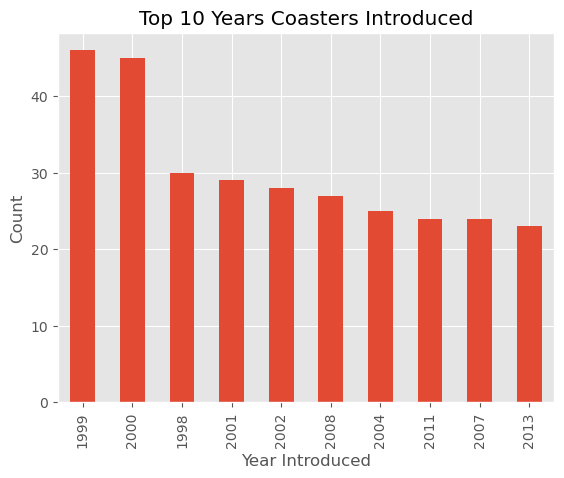

In [60]:
ax = df['Year_Introduced'].value_counts()\
    .head(10) \
    .plot(kind = 'bar', title = 'Top 10 Years Coasters Introduced')

ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')
plt.show()

In [43]:
df

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_date,Speed,Height,Inversion,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.57,-73.98,Wood,1884-06-16,6.00,NaN,0,2.90
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.58,-73.98,Wood,1895-01-01,NaN,NaN,1,12.00
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.58,-81.57,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.57,-73.98,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.35,-74.43,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.41,-81.46,Steel,2022-02-01,52.00,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.96,153.43,Wood,2022-01-01,49.70,105.00,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.23,-76.64,Steel,2022-01-01,73.00,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.00,NaN,0,NaN


In [46]:
df = df.rename(columns = {'Speed' : 'Speed_mph'})

In [47]:
df 

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_date,Speed_mph,Height,Inversion,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.57,-73.98,Wood,1884-06-16,6.00,NaN,0,2.90
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.58,-73.98,Wood,1895-01-01,NaN,NaN,1,12.00
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.58,-81.57,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.57,-73.98,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.35,-74.43,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.41,-81.46,Steel,2022-02-01,52.00,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.96,153.43,Wood,2022-01-01,49.70,105.00,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.23,-76.64,Steel,2022-01-01,73.00,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.00,NaN,0,NaN


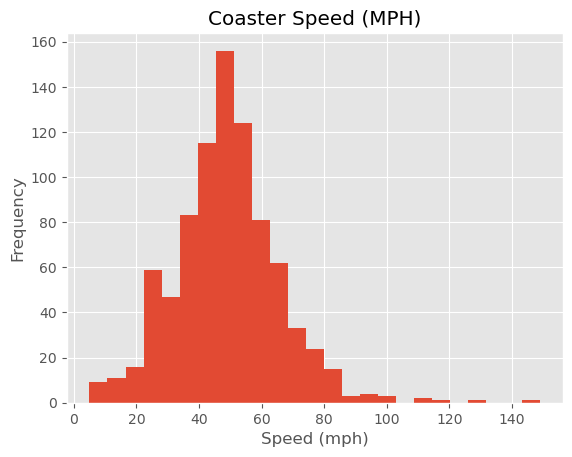

In [59]:
ax = df['Speed_mph'].plot(kind = 'hist', 
                         bins = 25,
                         title = 'Coaster Speed (MPH)')
ax.set_xlabel('Speed (mph)')
plt.show()

In [54]:
df

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_date,Speed_mph,Height,Inversion,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.57,-73.98,Wood,1884-06-16,6.00,NaN,0,2.90
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.58,-73.98,Wood,1895-01-01,NaN,NaN,1,12.00
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.58,-81.57,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.57,-73.98,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.35,-74.43,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.41,-81.46,Steel,2022-02-01,52.00,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.96,153.43,Wood,2022-01-01,49.70,105.00,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.23,-76.64,Steel,2022-01-01,73.00,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.00,NaN,0,NaN


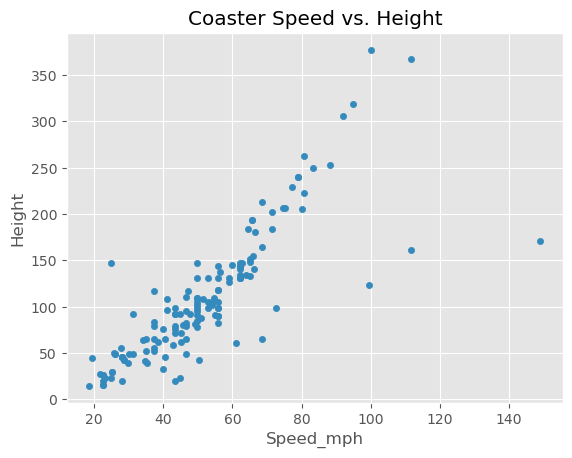

In [58]:
df.plot(kind = 'scatter',
            x = 'Speed_mph',
            y = 'Height',
            title = 'Coaster Speed vs. Height')
plt.show()

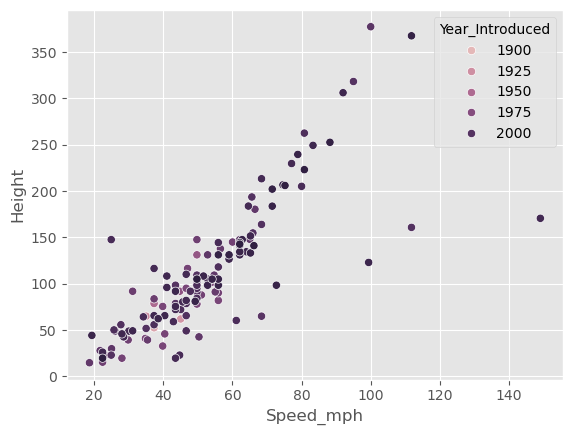

In [73]:
sns.scatterplot( x = 'Speed_mph',
                 y = 'Height',
                 hue = 'Year_Introduced',
                 data = df)

plt.show()

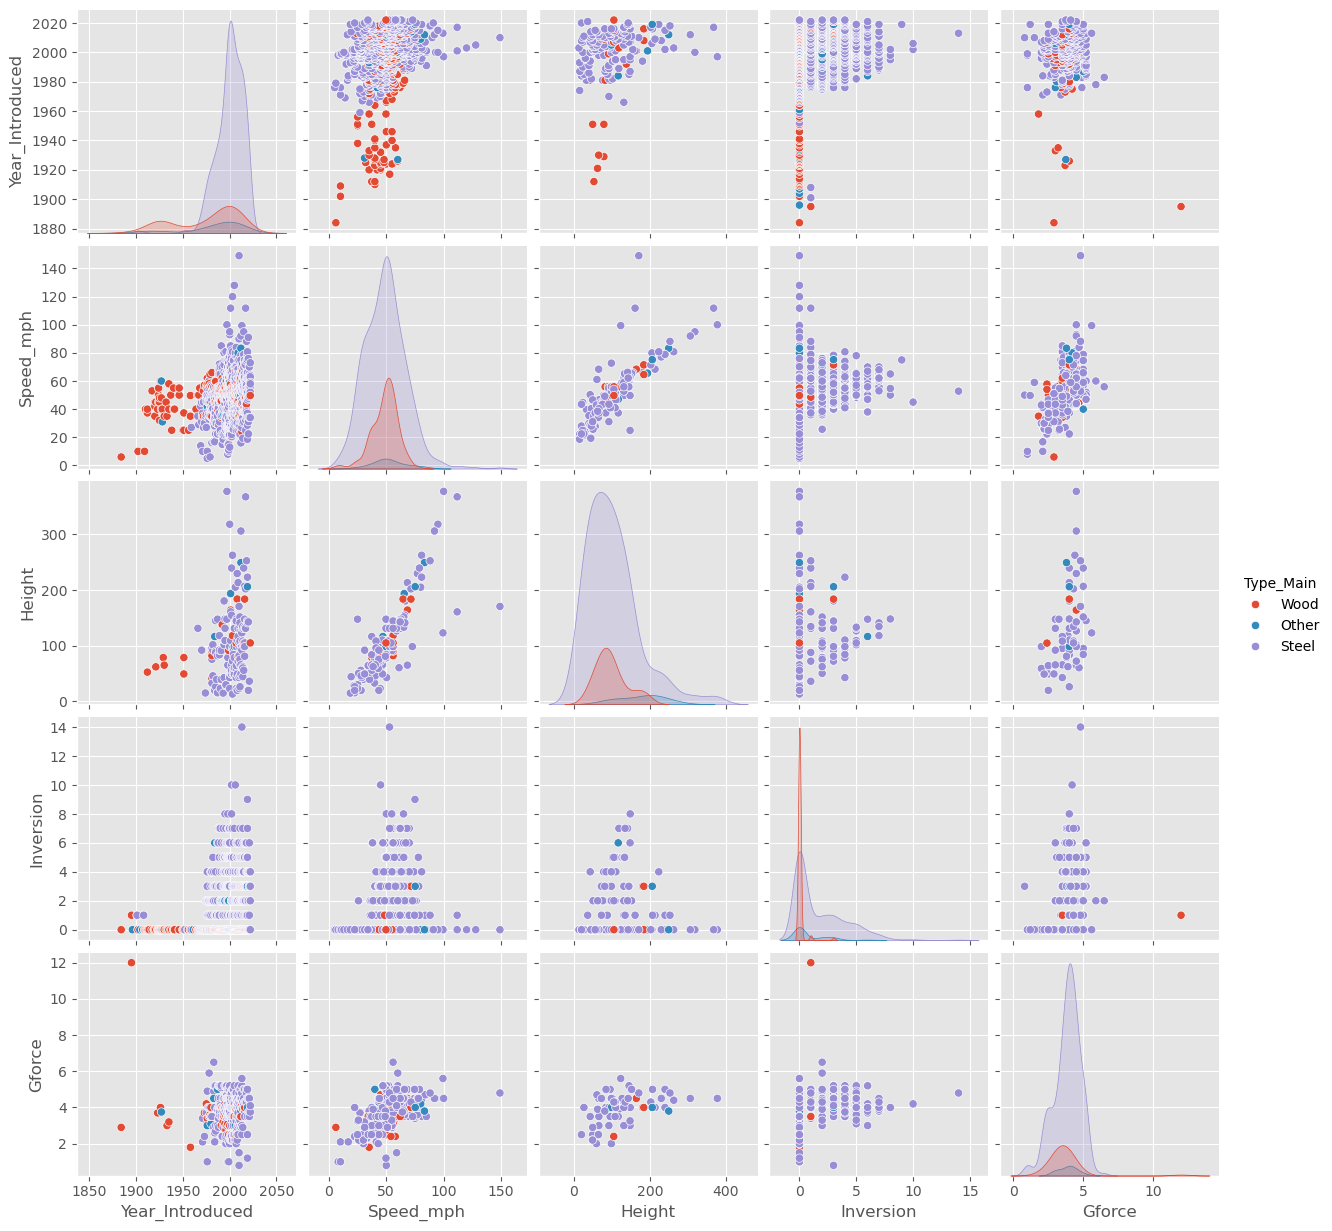

In [68]:
sns.pairplot(df, vars = ['Year_Introduced', 'Speed_mph',
                        'Height', 'Inversion', 'Gforce'],
             hue = 'Type_Main')
plt.show()

In [72]:
df_corr = df.dropna() \
            .corr(numeric_only = True)
df_corr

,Year_Introduced,latitude,longitude,Speed_mph,Height,Inversion,Gforce
Year_Introduced,1.00,-0.01,0.04,0.11,0.08,-0.25,0.12
latitude,-0.01,1.00,-0.81,0.07,0.00,0.16,0.23
longitude,0.04,-0.81,1.00,-0.04,-0.01,-0.09,-0.18
Speed_mph,0.11,0.07,-0.04,1.00,0.72,-0.03,0.61
Height,0.08,0.00,-0.01,0.72,1.00,-0.08,0.45
Inversion,-0.25,0.16,-0.09,-0.03,-0.08,1.00,0.29
Gforce,0.12,0.23,-0.18,0.61,0.45,0.29,1.00


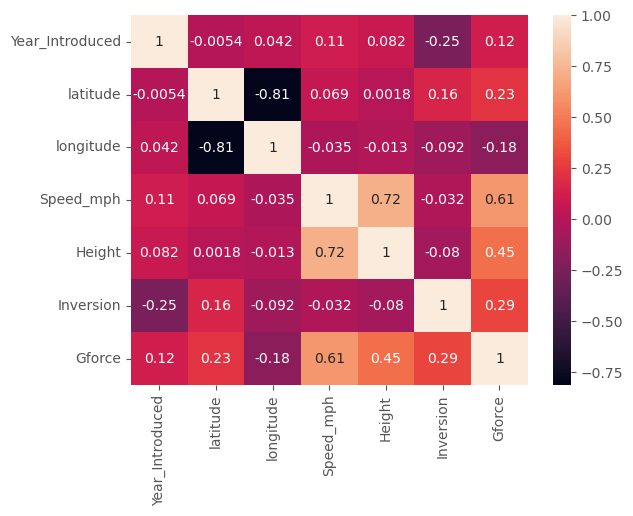

In [79]:
sns.heatmap(df_corr, annot = True)
plt.show()

In [78]:
df['Location'].value_counts()

Location
Other                            181
Kings Island                      19
Cedar Point                       18
Six Flags Magic Mountain          17
Hersheypark                       16
                                ... 
Granada Studios Tour               1
Funtown Splashtown USA             1
Tolchester Beach Park              1
Suzuka, Mie Prefecture, Japan      1
Epcot                              1
Name: count, Length: 280, dtype: int64

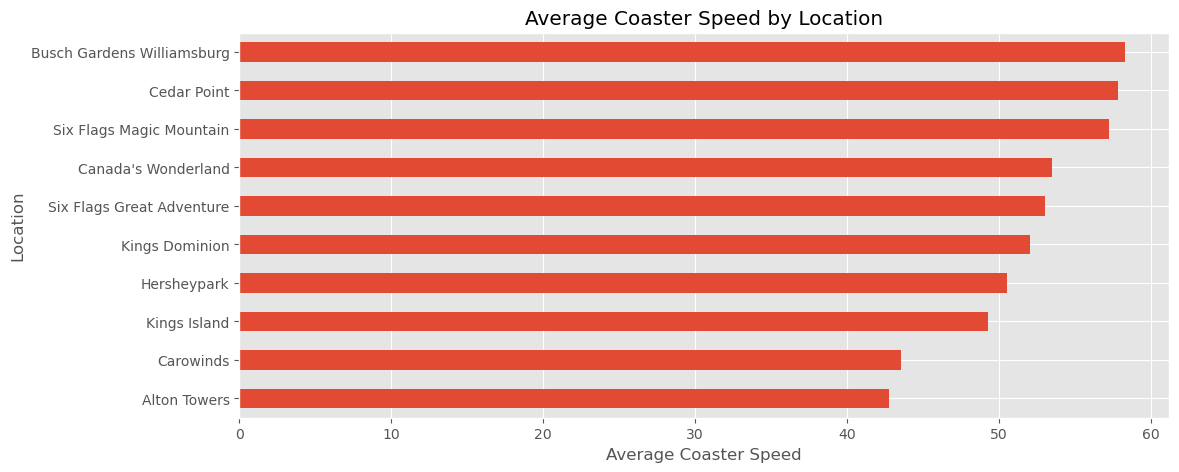

In [87]:
ax = df.query('Location != "Other"')\
    .groupby('Location')['Speed_mph']\
    .agg(['mean', 'count'])\
    .query('count >=10')\
    .sort_values('mean')['mean']\
    .plot(kind = 'barh', figsize = (12,5), title = 'Average Coaster Speed by Location')

ax.set_xlabel('Average Coaster Speed')
plt.show()